In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip3 install matplotlib --trusted-host mirrors.aliyun.com

Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.1.0%2Bcu121-cp311-cp311-win_amd64.whl (2473.9 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.16.0%2Bcu121-cp311-cp311-win_amd64.whl (5.8 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.1.0%2Bcu121-cp311-cp311-win_amd64.whl (4.0 MB)
  Using cached https://download.pytorch.org/whl/filelock-3.9.0-py3-none-any.whl (9.7 kB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached https://download.pytorch.org/whl/networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached https://download.pytorch.org/whl/fsspec-2023.4.0-py3-none-any.whl (153 kB)
  Using cached https://download.pytorch.org/whl/numpy-1.24.1-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached https://download.pytorch.org/whl/Pillow


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch

x = torch.linspace(0, 100, 100).type(torch.FloatTensor)

rand = torch.randn(100) * 10
y = x + rand

# 测试集

x_train = x[: -10]
print(x_train)

x_test = x[-10:]

y_train = y[: -10]
y_test = y[-10:]

tensor([ 0.0000,  1.0101,  2.0202,  3.0303,  4.0404,  5.0505,  6.0606,  7.0707,
         8.0808,  9.0909, 10.1010, 11.1111, 12.1212, 13.1313, 14.1414, 15.1515,
        16.1616, 17.1717, 18.1818, 19.1919, 20.2020, 21.2121, 22.2222, 23.2323,
        24.2424, 25.2525, 26.2626, 27.2727, 28.2828, 29.2929, 30.3030, 31.3131,
        32.3232, 33.3333, 34.3434, 35.3535, 36.3636, 37.3737, 38.3838, 39.3939,
        40.4040, 41.4141, 42.4242, 43.4343, 44.4444, 45.4545, 46.4646, 47.4747,
        48.4848, 49.4949, 50.5051, 51.5152, 52.5253, 53.5354, 54.5455, 55.5556,
        56.5657, 57.5758, 58.5859, 59.5960, 60.6061, 61.6162, 62.6263, 63.6364,
        64.6465, 65.6566, 66.6667, 67.6768, 68.6869, 69.6970, 70.7071, 71.7172,
        72.7273, 73.7374, 74.7475, 75.7576, 76.7677, 77.7778, 78.7879, 79.7980,
        80.8081, 81.8182, 82.8283, 83.8384, 84.8485, 85.8586, 86.8687, 87.8788,
        88.8889, 89.8990])


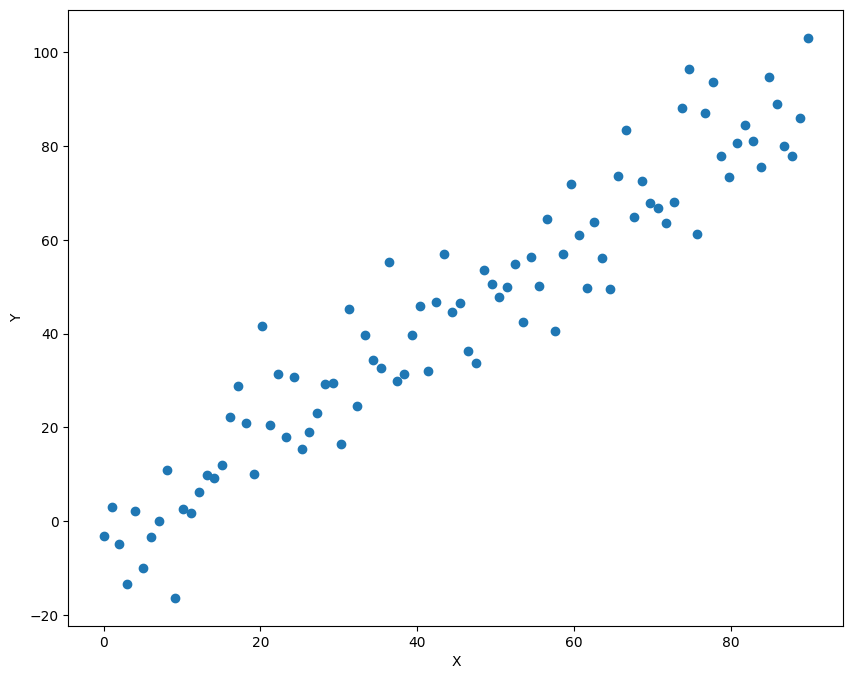

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

准备训练

In [6]:
a = torch.rand(1, requires_grad = True)
b = torch.rand(1, requires_grad = True)

# 设置学习率
learning_rate = 0.0001

for i in range(1000):
    # expand_as: 扩展维度
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)

    # 计算均值
    loss = torch.mean((predictions - y_train) ** 2)
    print('loss:', loss)
    loss.backward()

    # 在PyTorch中，如果某个函数后面加上了“_”，就表明要用这个函数的计算结果更新当前的变量。
    # a.data.add_(3)的作用是将a.data的数值更新为a.data加上3。
    a.data.add_(- learning_rate * a.grad.data)
    b.data.add_(- learning_rate * b.grad.data)

    a.grad.data.zero_()
    b.grad.data.zero_()

print('ok')

loss: tensor(358.5460, grad_fn=<MeanBackward0>)
loss: tensor(143.4337, grad_fn=<MeanBackward0>)
loss: tensor(98.3035, grad_fn=<MeanBackward0>)
loss: tensor(88.8348, grad_fn=<MeanBackward0>)
loss: tensor(86.8479, grad_fn=<MeanBackward0>)
loss: tensor(86.4305, grad_fn=<MeanBackward0>)
loss: tensor(86.3425, grad_fn=<MeanBackward0>)
loss: tensor(86.3235, grad_fn=<MeanBackward0>)
loss: tensor(86.3190, grad_fn=<MeanBackward0>)
loss: tensor(86.3176, grad_fn=<MeanBackward0>)
loss: tensor(86.3168, grad_fn=<MeanBackward0>)
loss: tensor(86.3162, grad_fn=<MeanBackward0>)
loss: tensor(86.3156, grad_fn=<MeanBackward0>)
loss: tensor(86.3150, grad_fn=<MeanBackward0>)
loss: tensor(86.3144, grad_fn=<MeanBackward0>)
loss: tensor(86.3138, grad_fn=<MeanBackward0>)
loss: tensor(86.3132, grad_fn=<MeanBackward0>)
loss: tensor(86.3125, grad_fn=<MeanBackward0>)
loss: tensor(86.3119, grad_fn=<MeanBackward0>)
loss: tensor(86.3113, grad_fn=<MeanBackward0>)
loss: tensor(86.3107, grad_fn=<MeanBackward0>)
loss: tenso

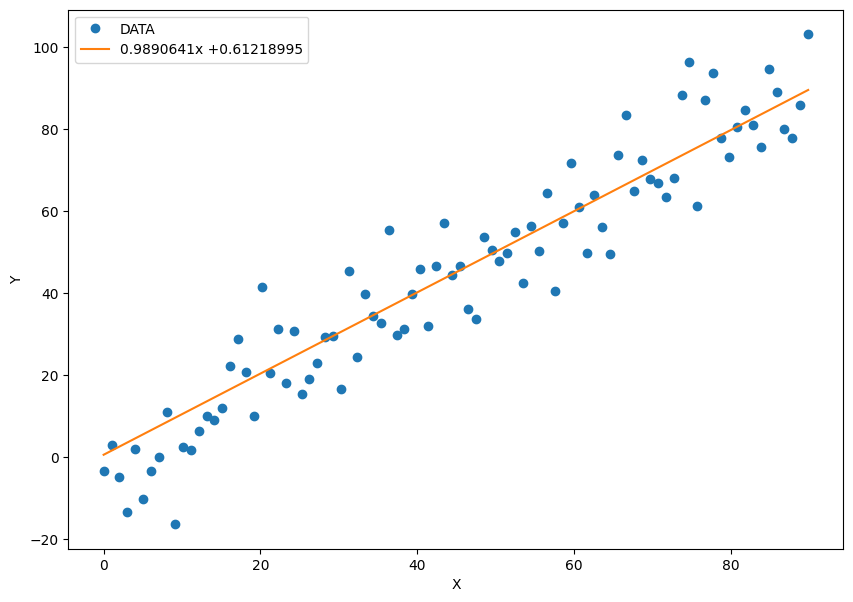

In [9]:
# 可视化
x_data = x_train.data.numpy()
plt.figure(figsize = (10,7))

xplot, =plt.plot(x_data, y_train.data.numpy(), 'o')
yplot, =plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())

plt.xlabel('X')
plt.ylabel('Y')

str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
plt.legend([xplot, yplot], ['DATA', str1])
plt.show()

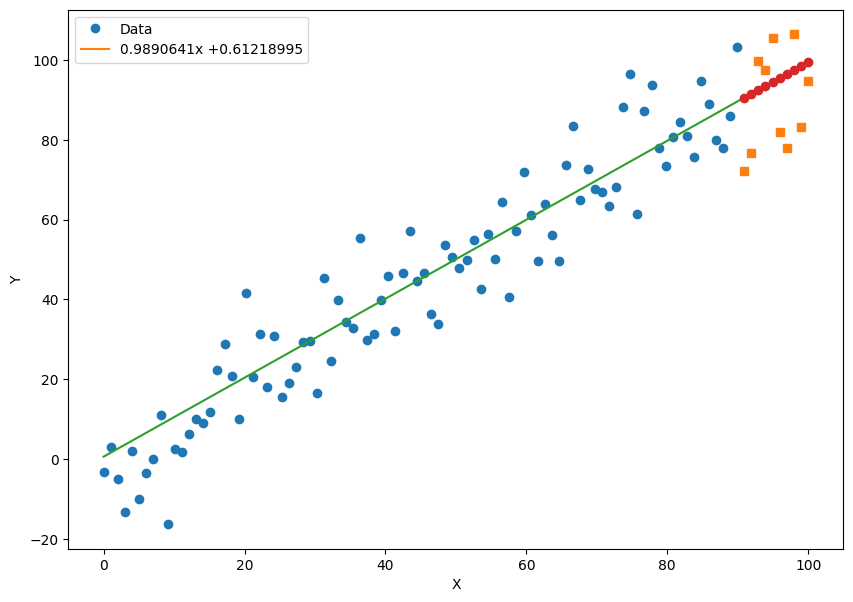

In [11]:
import numpy as np

# 预测
x_data = x_train.data.numpy() # 获得x包裹的数据
x_pred = x_test.data.numpy() # 获得包裹的测试数据的自变量
plt.figure(figsize = (10, 7)) # 设定绘图窗口大小
plt.plot(x_data, y_train.data.numpy(), 'o') # 绘制训练数据
plt.plot(x_pred, y_test.data.numpy(), 's') # 绘制测试数据
x_data = np.r_[x_data, x_test.data.numpy()]
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  # 绘制拟合数据
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o') # 绘制预测数据
plt.xlabel('X') # 更改横坐标轴标注
plt.ylabel('Y') # 更改纵坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0]) # 图例信息
plt.legend([xplot, yplot],['Data', str1]) # 绘制图例
plt.show()